In [1]:
# Importing the Liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [2]:
# Loading the data 
df = pd.read_csv("new_insurance_data.csv")
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [3]:
# Checking the values and Dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [4]:
# Checking missing values.
df.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [5]:
#. Filling missing values with mean and mode. 
col = list(df.columns)
for co in col:
    if df[co].dtypes=='object':
        df[co]=df[co].fillna(df[co].mode()[0])
    else:
        df[co]=df[co].fillna(df[co].mean())

In [6]:
df.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

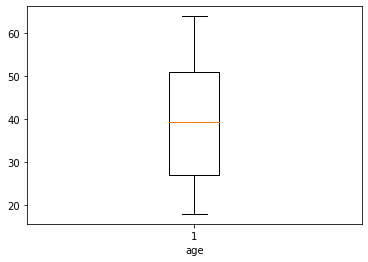

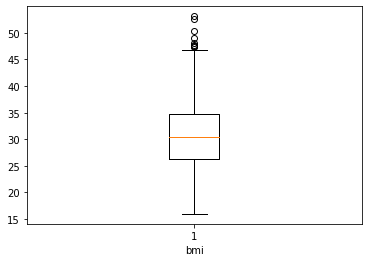

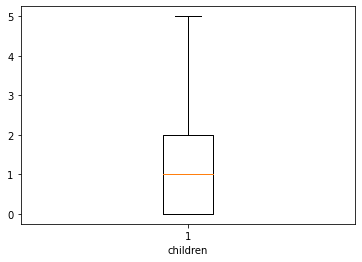

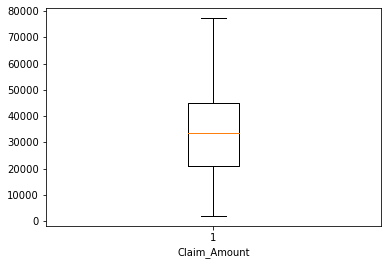

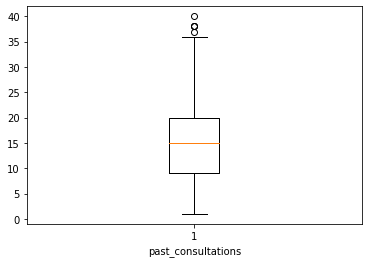

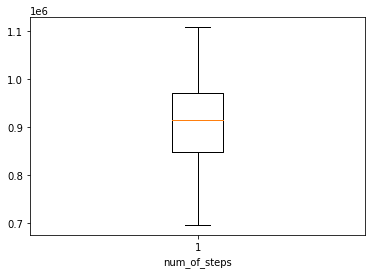

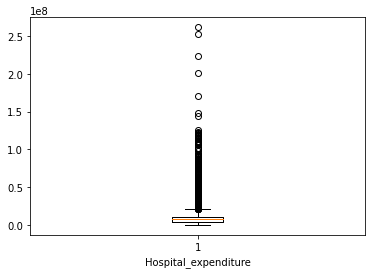

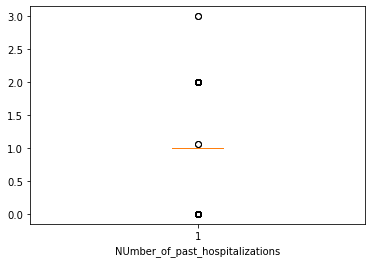

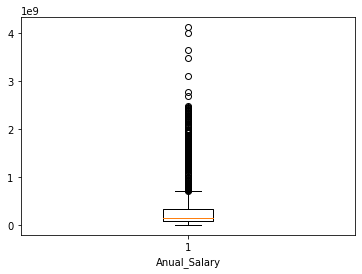

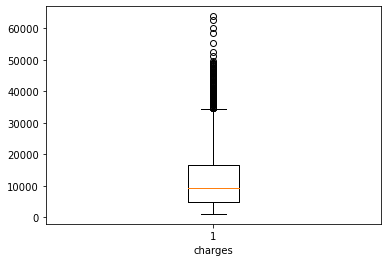

In [7]:
# Checking Outliers in the data. 
for i in col:
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [8]:
col_list = df.columns
col_list = ['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
col_list

['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']

In [9]:
# Removing the outliers from the data. 
for i in col_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    df = df[(df[i] >= Q1-1.5*IQR)&(df[i]<= Q3+1.5*IQR)]


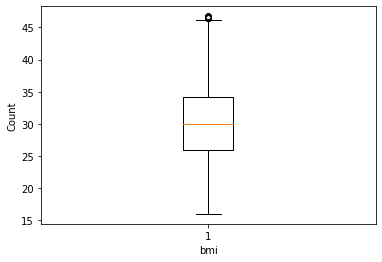

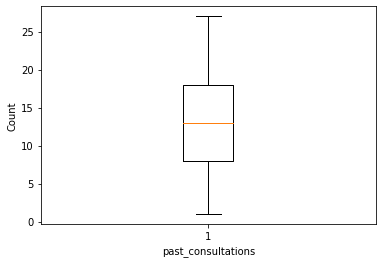

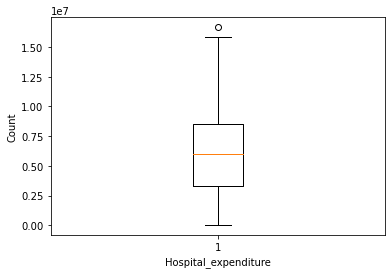

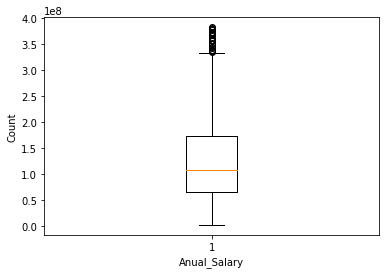

In [10]:
# checking the outliers after removing from the data. 
for i in col_list:
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [11]:
# shape after removing outliers
df.shape

(1030, 13)

In [12]:
# cheking the Multicolinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for i in df.columns:
    if (df[i].dtypes !='object') & (i != 'charges'):
        col_list.append(i)
x=df[col_list]
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif


,Feature,VIF
0,age,15.452095
1,bmi,26.330788
2,children,2.029618
3,Claim_Amount,5.678660
4,past_consultations,6.258017
5,num_of_steps,61.574692
6,Hospital_expenditure,5.204376
7,NUmber_of_past_hospitalizations,12.052060
8,Anual_Salary,5.481823


In [13]:
# Removing the columns after checking the variance inflation factore
df = df.drop(columns=['age','bmi','num_of_steps','NUmber_of_past_hospitalizations'])

In [14]:
# After removing checking the Multicolinearity again.
col_list=[]
for co in df.columns:
    if (df[co].dtypes !='object') & (co != 'charges'):
        col_list.append(co)
x=df[col_list]
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Feature,VIF
0,children,1.713101
1,Claim_Amount,4.152224
2,past_consultations,4.670212
3,Hospital_expenditure,4.320876
4,Anual_Salary,4.279483


<AxesSubplot:>

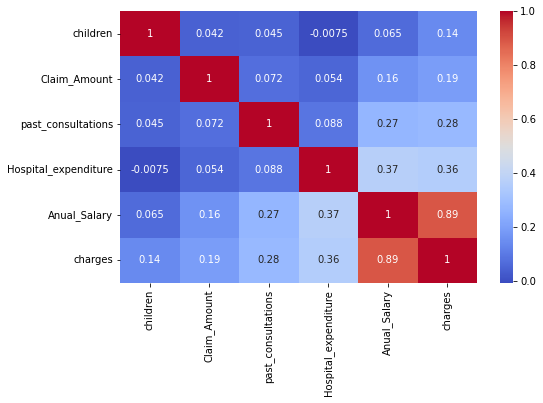

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [16]:
# Building the Model 
df

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,male,0.0,no,29087.54313,17.0,4.720921e+06,5.578497e+07,southeast,1121.87390
1,male,0.0,no,39053.67437,7.0,4.329832e+06,1.370089e+07,southeast,1131.50660
2,male,0.0,no,39023.62759,19.0,6.884861e+06,7.352311e+07,southeast,1135.94070
3,male,0.0,no,28185.39332,11.0,4.274774e+06,7.581968e+07,southeast,1136.39940
4,male,0.0,no,14697.85941,16.0,3.787294e+06,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...
1046,female,1.0,yes,51168.25474,23.0,1.665982e+07,3.712188e+08,southeast,19107.77960
1048,male,3.0,yes,46619.40230,27.0,1.361938e+07,3.812895e+08,southwest,19199.94400
1050,male,0.0,yes,24382.58056,21.0,1.028991e+07,3.745310e+08,southeast,19350.36890
1062,female,2.0,yes,21596.43846,10.0,1.083030e+07,3.696849e+08,northeast,19798.05455


In [17]:
x=df.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=df.iloc[:,-1]


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,train_size=0.8)

In [19]:
model1 = LinearRegression()


In [20]:
l = model1.fit(x_train,y_train)

In [21]:
y_pred = l.predict(x_test)

In [22]:
check_error = pd.DataFrame(columns={'Actual','Predict'})
check_error['Actual']  = y_test
check_error['Predict'] = y_pred
check_error['Error']   = check_error['Actual']- check_error['Predict']
check_error

,Actual,Predict,Error
752,10704.47000,7410.793683,3293.676317
723,10197.77220,10525.460329,-327.688129
177,2801.25880,4225.681868,-1424.423068
834,11848.14100,11784.670642,63.470358
718,10107.22060,9710.447699,396.772901
...,...,...,...
627,8688.85885,5781.937583,2906.921267
993,16085.12750,14969.262737,1115.864763
426,5976.83110,4926.602197,1050.228903
895,12925.88600,11617.127211,1308.758789


In [23]:
print('LR - Accuracy',r2_score(y_test,y_pred))
print('LF - MSE',mean_squared_error(y_test,y_pred))
print('LR MAE',mean_absolute_error(y_test,y_pred))
print('LR MAE%',mean_absolute_percentage_error(y_test,y_pred))

LR - Accuracy 0.8436003409637121
LF - MSE 2727704.3912803964
LR MAE 1334.9095397350538
LR MAE% 0.2815743939321439


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
ref = RandomForestRegressor()

In [31]:
r=ref.fit(x_train,y_train)

In [32]:
y_d = r.predict(x_test)

In [33]:
print('RF - Acuuracy',r2_score(y_test,y_d))
print('RF - MSE',mean_squared_error(y_test,y_d))
print('RF- MAS',mean_absolute_error(y_test,y_d))
print('RF - MAE%',mean_absolute_percentage_error(y_test,y_d))

RF - Acuuracy 0.8514372709375665
RF - MSE 2591023.6054298356
RF- MAS 1262.580951023155
RF - MAE% 0.24601335658069431
